## 题目：寻找关键用户和分析社交关系

### data.json 数据描述
#### 1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
#### 2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：
- 节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
- 边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...

### 问题
#### 1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

#### 2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

#### 3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
 
#### 4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

Yanyan-Wang 的直接朋友: ['Aarebecca', 'pomelo-nwu', 'yangzy0603', 'tyn1998', 'yvonneyx', 'lidongze0629', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'wj23027', 'frank-zsy', 'andyhuang18', 'bifenglin']
Aarebecca 的直接朋友: ['Yanyan-Wang', 'pomelo-nwu', 'yangzy0603', 'yvonneyx', 'lidongze0629', 'tyn1998', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'frank-zsy']
pomelo-nwu 的直接朋友: ['Yanyan-Wang', 'Aarebecca', 'yangzy0603', 'tyn1998', 'lidongze0629', 'yvonneyx', 'RackweLLizm', 'yikenie', 'bifenglin', 'frank-zsy', 'yubo0923', 'wj23027', 'andyhuang18', 'Maple0817', 'will-ww', 'zhicheng-ning', 'PureNatural', 'xiaoya-yaya', 'xgdyp', 'longyanz', 'Zzzzzhuzhiwei', 'birdflyi', 'lhbvvvvv', 'zhaosj975']
tyn1998 的直接朋友: ['andyhuang18', 'pomelo-nwu', 'frank-zsy', 'wj23027', 'bifenglin', 'Yanyan-Wang', 'will-ww', 'Zzzzzhuzhiwei', 'lhbvvvvv', 'zhicheng-ning', 'PureNatural', 'yangzy0603', 'xgdyp', 'stevending1st', 'wxharry', 'Aarebecca', 'birdflyi', 'xiaoya-yaya', 'pranavshuklaa', 'lidongze0629', 'yvo

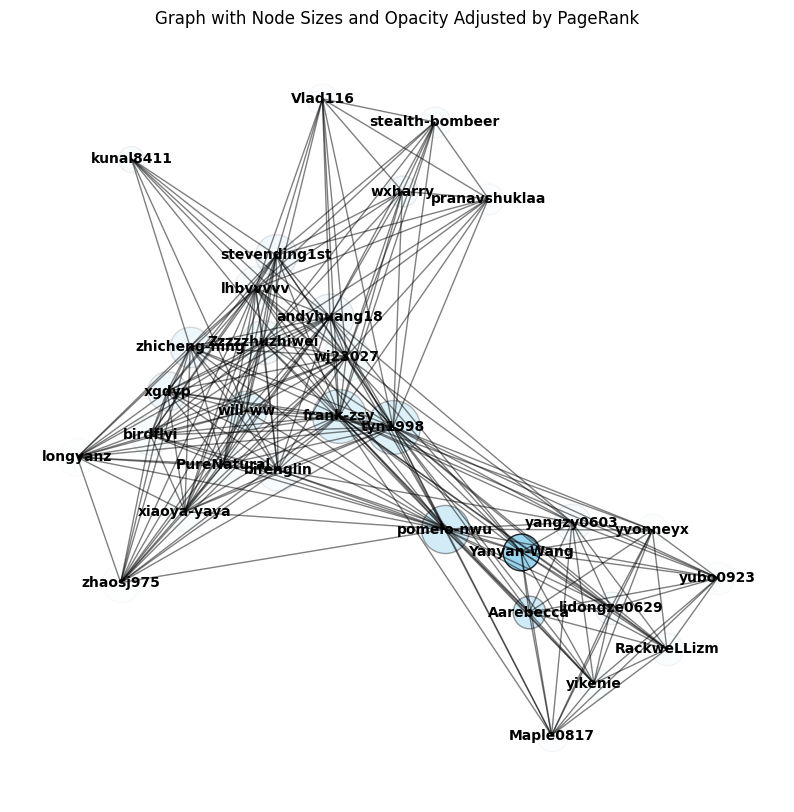

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
nodes = [["Yanyan-Wang",50.95],["Aarebecca",23.82],["pomelo-nwu",22.36],["tyn1998",16.64],["frank-zsy",15.8],["will-ww",13.5],["zhicheng-ning",8.35],["xgdyp",7.58],["stevending1st",6.28],["andyhuang18",6.27],["Zzzzzhuzhiwei",6.21],["wxharry",4.79],["bifenglin",4.01],["yangzy0603",3.83],["lidongze0629",3.73],["wj23027",3.56],["PureNatural",3.37],["kunal8411",3.36],["birdflyi",3.28],["lhbvvvvv",3.12],["xiaoya-yaya",2.39],["stealth-bombeer",2.36],["yikenie",2.31],["RackweLLizm",2.28],["pranavshuklaa",1.79],["Vlad116",1.79],["Maple0817",1.63],["yvonneyx",1.22],["yubo0923",1.12],["zhaosj975",1],["longyanz",0.74]]
edges = [["Yanyan-Wang","Aarebecca",25.3],["Yanyan-Wang","pomelo-nwu",25.09],["Aarebecca","pomelo-nwu",24.84],["andyhuang18","tyn1998",15.28],["yangzy0603","pomelo-nwu",13.85],["bifenglin","will-ww",13.32],["tyn1998","pomelo-nwu",12.48],["yangzy0603","Aarebecca",11.92],["tyn1998","frank-zsy",11.87],["yangzy0603","Yanyan-Wang",11.85],["wj23027","andyhuang18",11.03],["zhicheng-ning","will-ww",10.82],["wj23027","tyn1998",10.64],["tyn1998","bifenglin",9.84],["tyn1998","Yanyan-Wang",9.62],["Zzzzzhuzhiwei","frank-zsy",9.52],["tyn1998","will-ww",9.15],["Zzzzzhuzhiwei","will-ww",8.83],["xgdyp","frank-zsy",8.44],["andyhuang18","will-ww",8.19],["lidongze0629","pomelo-nwu",8.1],["Zzzzzhuzhiwei","tyn1998",7.93],["andyhuang18","zhicheng-ning",7.88],["lhbvvvvv","tyn1998",7.84],["PureNatural","bifenglin",7.75],["zhicheng-ning","tyn1998",7.73],["yvonneyx","Aarebecca",7.73],["Zzzzzhuzhiwei","xgdyp",7.71],["xgdyp","PureNatural",7.67],["yvonneyx","pomelo-nwu",7.63],["will-ww","frank-zsy",7.62],["xgdyp","bifenglin",7.61],["xiaoya-yaya","bifenglin",7.42],["yvonneyx","Yanyan-Wang",7.39],["Zzzzzhuzhiwei","lhbvvvvv",7.37],["tyn1998","PureNatural",7.32],["PureNatural","frank-zsy",7.29],["Yanyan-Wang","lidongze0629",7.25],["yangzy0603","tyn1998",7.15],["wj23027","zhicheng-ning",7.1],["lhbvvvvv","andyhuang18",7.07],["PureNatural","will-ww",7.06],["birdflyi","xgdyp",6.99],["xgdyp","tyn1998",6.96],["lhbvvvvv","will-ww",6.92],["tyn1998","stevending1st",6.85],["stevending1st","frank-zsy",6.84],["birdflyi","frank-zsy",6.71],["Aarebecca","lidongze0629",6.58],["wxharry","tyn1998",6.54],["Zzzzzhuzhiwei","PureNatural",6.49],["bifenglin","frank-zsy",6.4],["tyn1998","Aarebecca",6.4],["zhicheng-ning","bifenglin",6.34],["andyhuang18","frank-zsy",6.29],["wj23027","will-ww",6.26],["Zzzzzhuzhiwei","birdflyi",6.22],["xiaoya-yaya","will-ww",6.19],["xgdyp","will-ww",6.14],["Zzzzzhuzhiwei","zhicheng-ning",6.11],["birdflyi","bifenglin",6.04],["birdflyi","PureNatural",6.01],["lhbvvvvv","frank-zsy",5.92],["yangzy0603","yvonneyx",5.84],["Zzzzzhuzhiwei","bifenglin",5.79],["yangzy0603","lidongze0629",5.6],["andyhuang18","bifenglin",5.59],["andyhuang18","wxharry",5.53],["wj23027","frank-zsy",5.48],["zhicheng-ning","frank-zsy",5.33],["Zzzzzhuzhiwei","andyhuang18",5.31],["birdflyi","tyn1998",5.19],["xiaoya-yaya","tyn1998",5.09],["birdflyi","will-ww",4.97],["lhbvvvvv","zhicheng-ning",4.97],["RackweLLizm","pomelo-nwu",4.97],["Zzzzzhuzhiwei","stevending1st",4.96],["RackweLLizm","Aarebecca",4.84],["xiaoya-yaya","xgdyp",4.75],["yikenie","pomelo-nwu",4.66],["zhicheng-ning","PureNatural",4.63],["yikenie","Aarebecca",4.55],["Zzzzzhuzhiwei","wj23027",4.53],["RackweLLizm","Yanyan-Wang",4.5],["lhbvvvvv","wj23027",4.43],["yangzy0603","RackweLLizm",4.29],["andyhuang18","stevending1st",4.28],["yikenie","Yanyan-Wang",4.25],["zhicheng-ning","xgdyp",4.23],["pranavshuklaa","tyn1998",4.19],["xiaoya-yaya","PureNatural",4.15],["xiaoya-yaya","zhicheng-ning",4.11],["bifenglin","pomelo-nwu",4.11],["tyn1998","lidongze0629",4.1],["lhbvvvvv","wxharry",4.08],["yangzy0603","yikenie",4.06],["longyanz","bifenglin",3.97],["pomelo-nwu","frank-zsy",3.96],["pranavshuklaa","wxharry",3.95],["yvonneyx","lidongze0629",3.93],["xgdyp","stevending1st",3.91],["yubo0923","pomelo-nwu",3.9],["yvonneyx","tyn1998",3.87],["wj23027","pomelo-nwu",3.86],["andyhuang18","PureNatural",3.83],["yubo0923","Aarebecca",3.82],["pranavshuklaa","andyhuang18",3.75],["longyanz","will-ww",3.69],["Zzzzzhuzhiwei","xiaoya-yaya",3.69],["lhbvvvvv","PureNatural",3.66],["wj23027","bifenglin",3.62],["yubo0923","Yanyan-Wang",3.61],["andyhuang18","pomelo-nwu",3.56],["lhbvvvvv","bifenglin",3.55],["lhbvvvvv","stevending1st",3.54],["stevending1st","will-ww",3.51],["stealth-bombeer","tyn1998",3.51],["birdflyi","stevending1st",3.48],["yangzy0603","yubo0923",3.47],["RackweLLizm","lidongze0629",3.4],["wj23027","stevending1st",3.37],["PureNatural","stevending1st",3.36],["stealth-bombeer","wxharry",3.35],["RackweLLizm","tyn1998",3.35],["xiaoya-yaya","birdflyi",3.33],["Maple0817","pomelo-nwu",3.32],["will-ww","pomelo-nwu",3.27],["Maple0817","Aarebecca",3.27],["yikenie","lidongze0629",3.26],["yvonneyx","RackweLLizm",3.24],["lhbvvvvv","xgdyp",3.23],["yikenie","tyn1998",3.21],["stealth-bombeer","andyhuang18",3.2],["Yanyan-Wang","Maple0817",3.11],["yvonneyx","yikenie",3.11],["zhicheng-ning","stevending1st",3.07],["tyn1998","Vlad116",3.05],["pranavshuklaa","lhbvvvvv",3.02],["birdflyi","zhicheng-ning",3.01],["yangzy0603","Maple0817",3.01],["longyanz","tyn1998",2.96],["longyanz","xiaoya-yaya",2.94],["wxharry","Vlad116",2.93],["yubo0923","lidongze0629",2.86],["xiaoya-yaya","frank-zsy",2.84],["zhaosj975","tyn1998",2.84],["yubo0923","tyn1998",2.83],["andyhuang18","Vlad116",2.81],["kunal8411","andyhuang18",2.78],["lhbvvvvv","birdflyi",2.78],["RackweLLizm","yikenie",2.77],["yubo0923","yvonneyx",2.75],["kunal8411","wj23027",2.74],["longyanz","zhicheng-ning",2.72],["stevending1st","bifenglin",2.71],["lhbvvvvv","stealth-bombeer",2.66],["pranavshuklaa","stealth-bombeer",2.6],["Maple0817","lidongze0629",2.54],["zhicheng-ning","pomelo-nwu",2.52],["tyn1998","Maple0817",2.51],["yubo0923","RackweLLizm",2.48],["andyhuang18","xgdyp",2.47],["yvonneyx","Maple0817",2.45],["yubo0923","yikenie",2.4],["lhbvvvvv","Vlad116",2.38],["PureNatural","pomelo-nwu",2.36],["wj23027","Yanyan-Wang",2.34],["longyanz","xgdyp",2.34],["pranavshuklaa","Vlad116",2.34],["longyanz","andyhuang18",2.33],["kunal8411","tyn1998",2.32],["xiaoya-yaya","andyhuang18",2.28],["longyanz","PureNatural",2.26],["xiaoya-yaya","pomelo-nwu",2.24],["RackweLLizm","Maple0817",2.23],["Zzzzzhuzhiwei","wxharry",2.22],["wj23027","PureNatural",2.21],["yikenie","Maple0817",2.17],["stealth-bombeer","Vlad116",2.11],["xgdyp","pomelo-nwu",2.1],["longyanz","pomelo-nwu",2.1],["Yanyan-Wang","frank-zsy",2.1],["wxharry","stevending1st",2.03],["kunal8411","zhicheng-ning",2.02],["yubo0923","Maple0817",1.99],["lhbvvvvv","xiaoya-yaya",1.98],["wj23027","xgdyp",1.87],["Zzzzzhuzhiwei","pranavshuklaa",1.87],["wj23027","xiaoya-yaya",1.85],["longyanz","wj23027",1.83],["yangzy0603","frank-zsy",1.77],["pranavshuklaa","stevending1st",1.73],["Zzzzzhuzhiwei","stealth-bombeer",1.72],["wj23027","wxharry",1.71],["kunal8411","stevending1st",1.69],["xiaoya-yaya","stevending1st",1.69],["zhaosj975","will-ww",1.65],["Zzzzzhuzhiwei","Vlad116",1.6],["stealth-bombeer","stevending1st",1.6],["Zzzzzhuzhiwei","longyanz",1.59],["zhaosj975","andyhuang18",1.56],["zhaosj975","bifenglin",1.54],["andyhuang18","birdflyi",1.51],["wxharry","frank-zsy",1.51],["Zzzzzhuzhiwei","pomelo-nwu",1.5],["Vlad116","stevending1st",1.5],["pranavshuklaa","wj23027",1.49],["zhaosj975","PureNatural",1.43],["stealth-bombeer","wj23027",1.4],["longyanz","birdflyi",1.36],["pranavshuklaa","frank-zsy",1.34],["birdflyi","pomelo-nwu",1.33],["wj23027","Vlad116",1.32],["yangzy0603","wj23027",1.31],["zhaosj975","zhicheng-ning",1.26],["stealth-bombeer","frank-zsy",1.26],["wj23027","birdflyi",1.25],["kunal8411","frank-zsy",1.2],["Vlad116","frank-zsy",1.2],["andyhuang18","Yanyan-Wang",1.14],["lhbvvvvv","pomelo-nwu",1.09],["zhaosj975","frank-zsy",1.09],["lhbvvvvv","zhaosj975",1.09],["zhaosj975","pomelo-nwu",1],["zhaosj975","wj23027",1],["Aarebecca","frank-zsy",0.97],["zhaosj975","xgdyp",0.93],["lhbvvvvv","longyanz",0.89],["lidongze0629","frank-zsy",0.89],["longyanz","frank-zsy",0.89],["yvonneyx","frank-zsy",0.88],["Yanyan-Wang","bifenglin",0.86],["RackweLLizm","frank-zsy",0.85],["yikenie","frank-zsy",0.84],["yangzy0603","andyhuang18",0.83],["longyanz","zhaosj975",0.83],["yubo0923","frank-zsy",0.81],["kunal8411","will-ww",0.79],["Maple0817","frank-zsy",0.78],["yangzy0603","bifenglin",0.67],["zhaosj975","birdflyi",0.67],["zhaosj975","xiaoya-yaya",0.67],["Zzzzzhuzhiwei","zhaosj975",0.67]]
 
network = {}  
for node in nodes:  
    user_name, influence_score = node  
    network[user_name] = {"influence": influence_score, "friends": {}}  
  
for edge in edges:  
    user1, user2, weight = edge  
    if user1 in network and user2 in network:  
        network[user1]["friends"][user2] = weight  
        network[user2]["friends"][user1] = weight  

direct_friends = {}  
for user, info in network.items():  
    direct_friends[user] = list(info["friends"].keys())

for user, friends in direct_friends.items():  
    print(f"{user} 的直接朋友: {friends}")

direct_length = {}
for user, info in network.items():  
    direct_length[user] = len(info["friends"])
    #print(f"{user} 的直接朋友数量: {direct_length[user]}")

sorted_length = sorted(direct_length.items(), key=lambda x: x[1], reverse=True)
top_5_= sorted_length[:5]
for user, length in top_5_:  
    print(f"{user} 的直接朋友数量: {length}")

sorted_nodes = sorted(network.items(), key=lambda x: x[1]["influence"], reverse=True)
top_5 = sorted_nodes[:5]
for user, info in top_5:  
    print(f"{user} 的影响力: {info['influence']}")

weighted_influence = {}
for user, info in network.items():  
    weighted_influence[user] = 0.5 * direct_length[user] + 0.5 * info["influence"]
    #print(f"{user} 的加权影响力: {weighted_influence[user]}")
    sorted_weighted = sorted(weighted_influence.items(), key=lambda x: x[1], reverse=True)
    top_5_weighted = sorted_weighted[:5]
for user, info in top_5_weighted:  
    print(f"{user} 的加权影响力: {info}")

new_friends = {}
for friends in direct_friends["Yanyan-Wang"]:
    for fris in direct_friends[friends]:  
        if fris not in direct_friends["Yanyan-Wang"] and fris != "Yanyan-Wang":
            new_friends[fris] = network[fris]["influence"]
#for user, info in new_friends.items():  
    #print(f"{user} : {info}")

connect_weight = network["Yanyan-Wang"]["friends"]  
sorted_weight_connect = sorted(connect_weight.items(), key=lambda x: x[1], reverse=True)
top_5_connect = sorted_weight_connect[:5]
for user, weight in top_5_connect:  
    print(f"{user} : {weight}")

G = nx.Graph()
for node in nodes:  
    user_name, influence_score = node  
    G.add_node(user_name, influence=influence_score)
for edge in edges:  
    user1, user2, weight = edge  
    G.add_edge(user1, user2, weight=weight)
pageranks = nx.pagerank(G)
nodes_sizes = [50 * direct_length[node] for node in G.nodes()]

# 计算每个节点的透明度
alphas = [(1/60) * network[node]["influence"] for node in G.nodes()]

# 计算每个节点的颜色
colors = ['skyblue'] * len(G.nodes())

# 绘制图形
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G) 

# 使用scatter方法绘制节点
for node, (x, y) in pos.items():
    plt.scatter(x, y, s=nodes_sizes[list(G.nodes()).index(node)], c=colors[list(G.nodes()).index(node)], alpha=alphas[list(G.nodes()).index(node)], edgecolors='k')


nx.draw_networkx_edges(G, pos, alpha=0.5)


nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

plt.title("Graph with Node Sizes and Opacity Adjusted by PageRank")
plt.axis('off') 
plt.show()


    

1.使用了字典表示法，直接朋友列表如上  
2.tyn1998 的直接朋友数量: 30
frank-zsy 的直接朋友数量: 30
pomelo-nwu 的直接朋友数量: 24
andyhuang18 的直接朋友数量: 23
wj23027 的直接朋友数量: 23  
Yanyan-Wang 的影响力: 50.95
Aarebecca 的影响力: 23.82
pomelo-nwu 的影响力: 22.36
tyn1998 的影响力: 16.64
frank-zsy 的影响力: 15.8  
Yanyan-Wang 的加权影响力: 32.475
tyn1998 的加权影响力: 23.32
pomelo-nwu 的加权影响力: 23.18
frank-zsy 的加权影响力: 22.9
Aarebecca 的加权影响力: 17.41  
3.最有可能成为新朋友的用户是will-ww ，推荐理由是其influnce值最高；
  五个连接强度最高者是Aarebecca : 25.3、pomelo-nwu : 25.09、yangzy0603 : 11.85、tyn1998 : 9.62、yvonneyx : 7.39  
4.结点大小代表度数的大小，颜色透明度代表影响力得分，将得分高的alpha值接近1。这么做的缺点是透明度有点影响了大小，透明度低的节点大小看的不是很明显。
 图中可以看到Yanyan-Wang结点透明度最高，代表影响力最高，而节点最大的是tyn1998和frank-zsy，代表直接朋友数量最高。图中不透明且较大的结点都是社交网络中具有影响力的人物。